In [17]:
# Steady-state analysis of a square plate

In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# Geometry and material
Lx = 1.0
Ly = 1.0
alpha = 1.0e-4  # m^2/s

# Grid (including boundaries)
Nx = 21
Ny = 21

# for plotting purposes later
x = np.linspace(0.0, Lx, Nx)
y = np.linspace(0.0, Ly, Ny)

dx = x[1] - x[0]
dy = y[1] - y[0]

print(f"Nx={Nx}, Ny={Ny}")
print(f"dx={dx:.6f} m, dy={dy:.6f} m")

Nx=21, Ny=21
dx=0.050000 m, dy=0.050000 m


In [11]:
# Allocate temperature field (Ny rows in y, Nx columns in x)
T = np.zeros((Nx, Ny), dtype=float)
T_left = 0.0
T_right = 100.0
T_bottom = 0.0
T_top = 0.0
# Enforce Dirichlet BCs (edges)
T[:, 0]  = T_left    # left edge
T[:, -1] = T_right    # right edge
T[0, :]  = T_bottom   # bottom edge
T[-1, :] = T_top    # top edge

In [12]:
x[-1]

np.float64(1.0)

In [13]:
T

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 100.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 100.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 100.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 100.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 100.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 100.],

In [14]:
# Gauss–Seidel settings
tol = 1e-6
max_sweeps = 2000

In [15]:
# ------------------------------------------------------------
# Gauss–Seidel sweeps (in-place update)
# Update interior nodes: i=1..Nx-2, j=1..Ny-2
# Laplace stencil (dx=dy):
#   T(i,j) <- 1/4 [ T(i+1,j)+T(i-1,j)+T(i,j+1)+T(i,j-1) ]
# ------------------------------------------------------------
for k in range(max_sweeps):
    max_change = 0.0

    for i in range(1, Nx-1):        # x-index
        for j in range(1, Ny-1):    # y-index

            Told = T[j, i]          # stored as T[j,i], interpreted as T(i,j)

            Tnew = 0.25 * (
                T[j, i+1] +         # T(i+1, j)
                T[j, i-1] +         # T(i-1, j)
                T[j+1, i] +         # T(i, j+1)
                T[j-1, i]           # T(i, j-1)
            )

            T[j, i] = Tnew

            change = abs(Tnew - Told)
            if change > max_change:
                max_change = change

    # Re-impose BCs (not strictly necessary if you never touch boundaries,
    # but it's a nice safety measure)
    T[:, 0]  = T_left
    T[:, -1] = T_right
    T[0, :]  = T_bottom
    T[-1, :] = T_top

    if max_change < tol:
        print(f"Converged in {k+1} sweeps (max_change={max_change:.3e})")
        break
    else:
        print(f"Stopped at max_sweeps={max_sweeps} (max_change={max_change:.3e})")

# Report center temperature (closest grid point)
ic = Nx // 2
jc = Ny // 2
print(f"Center node: i={ic}, j={jc}, (x,y)=({x[ic]:.3f},{y[jc]:.3f})")
print("Approx center temperature:", T[jc, ic])


Converged in 563 sweeps (max_change=9.981e-07)
Center node: i=10, j=10, (x,y)=(0.500,0.500)
Approx center temperature: 24.999960213336138


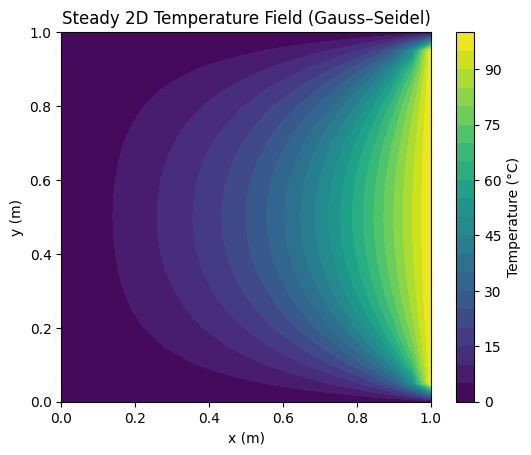

In [16]:
# ------------------------------------------------------------
# Plot: contour of temperature field
# ------------------------------------------------------------
X, Y = np.meshgrid(x, y)

plt.figure()
cs = plt.contourf(X, Y, T, levels=21)
plt.colorbar(cs, label="Temperature (°C)")
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.title("Steady 2D Temperature Field (Gauss–Seidel)")
plt.gca().set_aspect("equal", adjustable="box")
plt.show()

In [16]:
change

np.float64(1.9542767404345796e-08)